# Capstone Two: Exploratory Data Analysis (EDA)
Justin Ali  
Dataset: U.S. Lower 48 Hourly Electricity Demand & Generation

## 1. Project Objective and EDA Goals
## 2. Data Loading and Overview
## 3. Univariate Analysis
## 4. Bivariate Analysis
## 5. Correlation Analysis
## 6. Time-Based Analysis
## 7. Feature Engineering Insights
## 8. Key Findings and Next Steps

## 1. Project Objective and EDA Goals

The objective of this exploratory data analysis (EDA) is to understand the structure, distributions, and relationships within an hourly electricity dataset covering demand and net generation by energy source for the U.S. Lower 48. The goal of this analysis is to identify patterns, correlations, and temporal trends that can inform feature selection and modeling decisions in later stages of the capstone project.

This EDA focuses on examining individual feature distributions, relationships between electricity demand and generation sources, correlations among variables, and time-based patterns such as daily and seasonal cycles. Insights from this analysis will guide feature engineering and predictive modeling choices.

## 2. Data Loading and Overview

The dataset used in this analysis was produced during the data wrangling phase of the capstone. It contains hourly observations of total electricity demand and net generation by fuel type for the U.S. Lower 48. All timestamps are standardized to UTC time, and missing or invalid values were addressed during the wrangling process.

The dataset includes one response variable (`demand_mw`) and multiple explanatory variables representing generation from different energy sources.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [19]:
df = pd.read_csv(
    "../data/processed/us_lower48_hourly_clean.csv",
    parse_dates=["datetime"]
)

df.head()

,datetime,demand_mw,coal_mw,gas_mw,nuclear_mw,hydro_mw,solar_mw,wind_mw,petroleum_mw,other_mw
0,2015-07-01 05:00:00+00:00,162827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-07-01 06:00:00+00:00,335153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-07-01 07:00:00+00:00,333837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-07-01 08:00:00+00:00,398386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-07-01 09:00:00+00:00,388954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58936 entries, 0 to 58935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      58936 non-null  datetime64[ns, UTC]
 1   demand_mw     58936 non-null  int64              
 2   coal_mw       58936 non-null  float64            
 3   gas_mw        58936 non-null  float64            
 4   nuclear_mw    58936 non-null  float64            
 5   hydro_mw      58936 non-null  float64            
 6   solar_mw      58936 non-null  float64            
 7   wind_mw       58936 non-null  float64            
 8   petroleum_mw  58936 non-null  float64            
 9   other_mw      58936 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), int64(1)
memory usage: 4.5 MB


,demand_mw,coal_mw,gas_mw,nuclear_mw,hydro_mw,solar_mw,wind_mw,petroleum_mw,other_mw
count,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000
mean,455225.233032,56485.881753,89053.239955,49867.038211,17305.793369,4946.943244,20718.822893,1932.075540,4564.696976
std,74804.550019,54513.197770,85787.440914,45289.516421,16745.451573,9051.828493,21866.365572,2054.436034,4281.715876
min,162827.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,403987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,443225.000000,68270.500000,115393.500000,79232.500000,19826.500000,37.000000,17596.500000,1843.000000,6622.000000
75%,491449.000000,103393.000000,157572.750000,92785.000000,32380.250000,5034.500000,38542.000000,3425.250000,8174.250000
max,719649.000000,173523.000000,325855.000000,104655.000000,58025.000000,91280.000000,89207.000000,14118.000000,33996.000000


## 3. Univariate Analysis

Univariate analysis is used to examine the distribution and characteristics of each individual feature in the dataset. This step helps identify skewness, variability, outliers, and differences between baseload and variable energy sources.

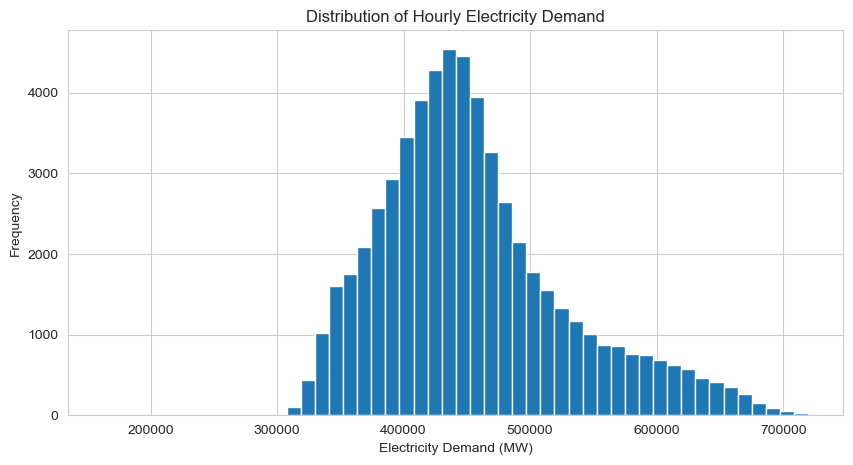

In [21]:
plt.figure(figsize=(10,5))
plt.hist(df["demand_mw"], bins=50)
plt.xlabel("Electricity Demand (MW)")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Electricity Demand")
plt.show()

The distribution of hourly electricity demand is right-skewed, with most observations concentrated around moderate demand levels and fewer observations at extreme high-demand values. This pattern is consistent with expected daily and seasonal fluctuations in electricity usage, where peak demand occurs less frequently than average demand.

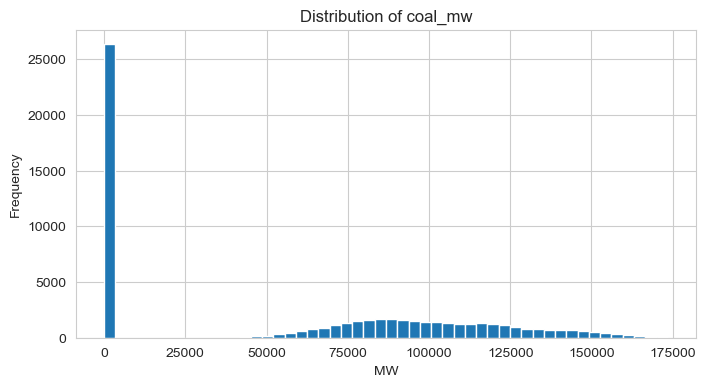

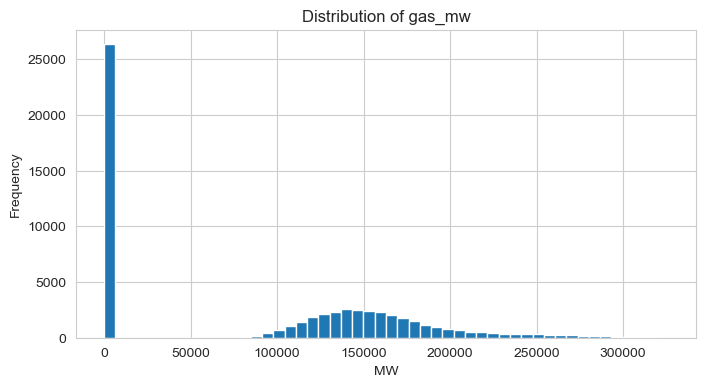

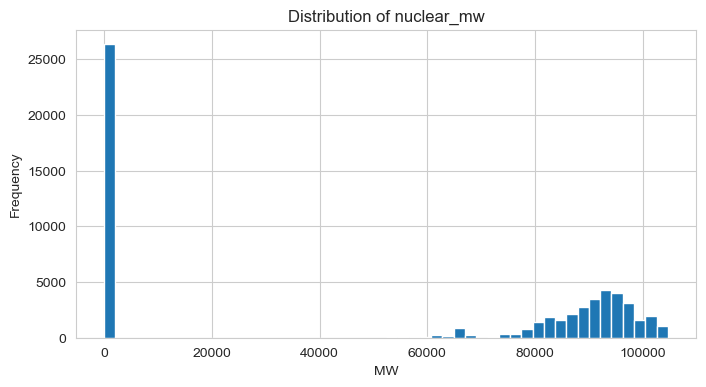

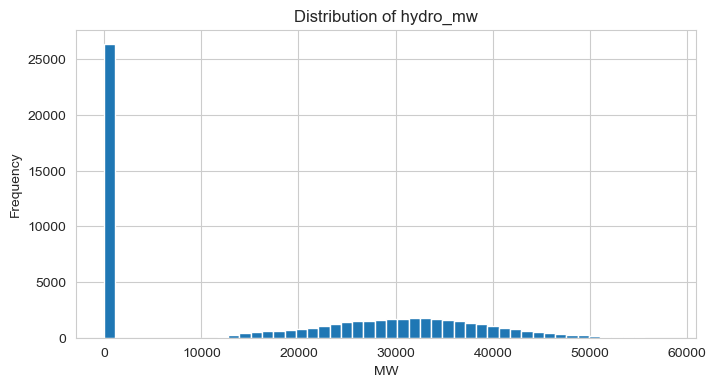

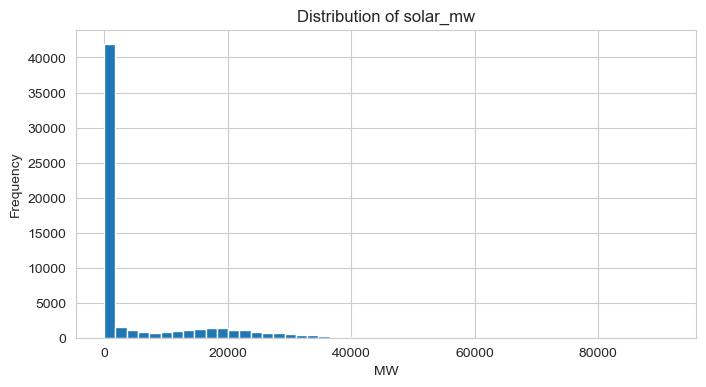

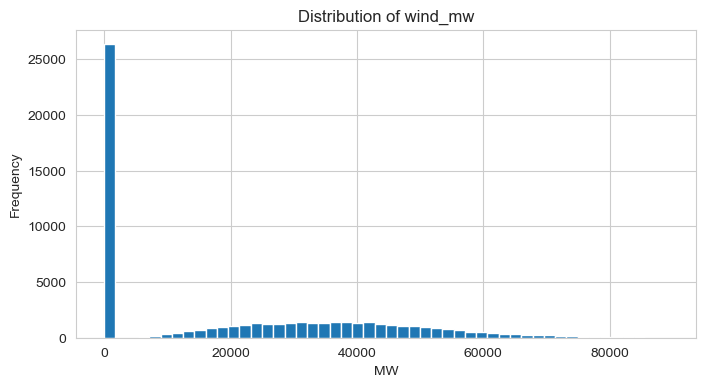

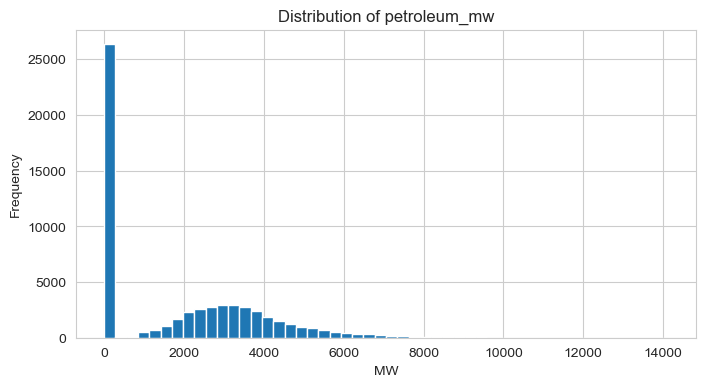

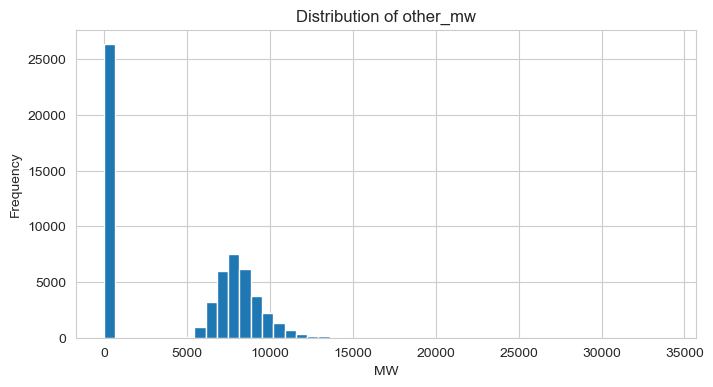

In [22]:
gen_cols = [
    "coal_mw", "gas_mw", "nuclear_mw", "hydro_mw",
    "solar_mw", "wind_mw", "petroleum_mw", "other_mw"
]

for col in gen_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel("MW")
    plt.ylabel("Frequency")
    plt.show()

Generation sources differ significantly in their distributions. Baseload sources such as nuclear and natural gas exhibit relatively stable distributions with fewer zero values, while renewable sources such as solar and wind show highly skewed distributions with many zero or near-zero observations. This reflects the intermittent nature of renewable energy generation and suggests that these features may behave differently in predictive models.

## 4. Bivariate Analysis

Bivariate analysis explores the relationships between electricity demand and individual generation sources. These visualizations help assess whether changes in generation from specific sources are associated with changes in overall electricity demand.

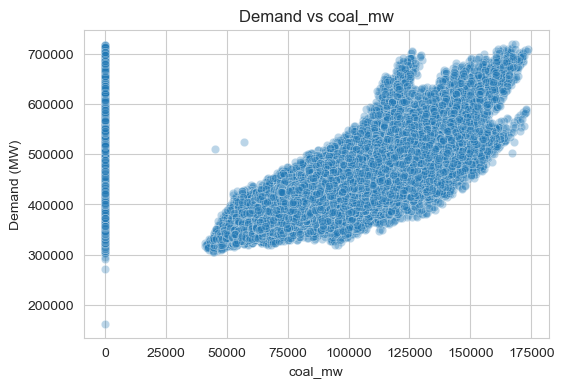

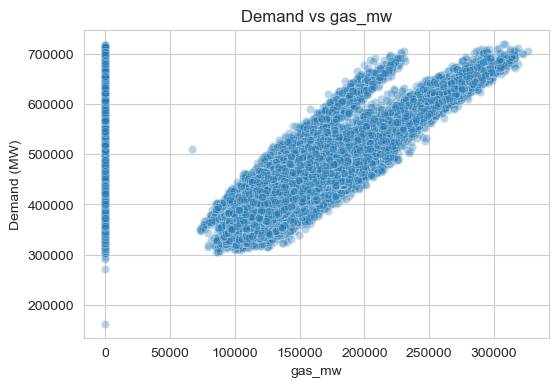

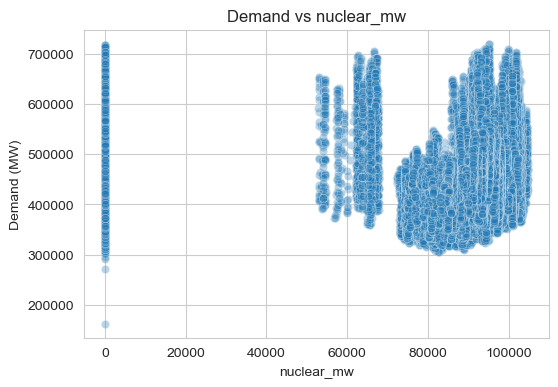

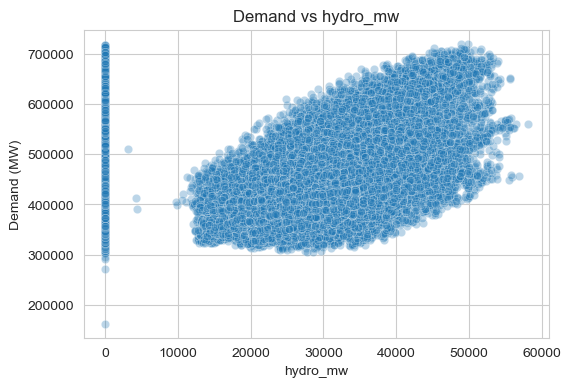

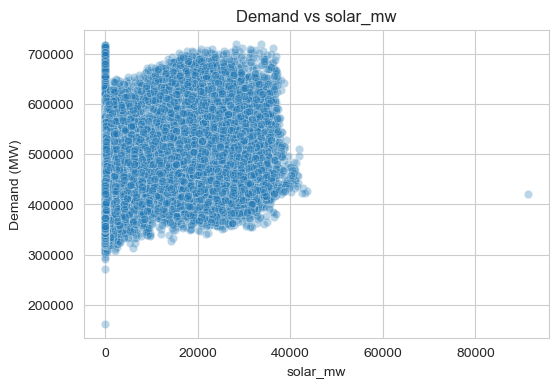

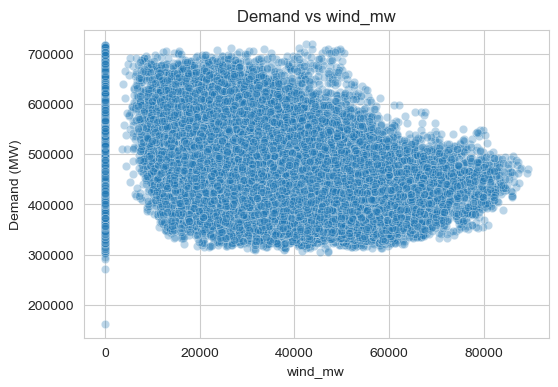

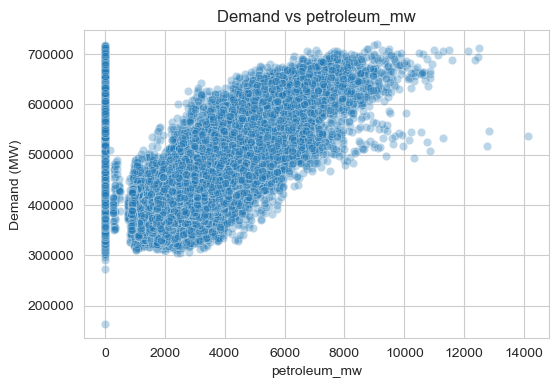

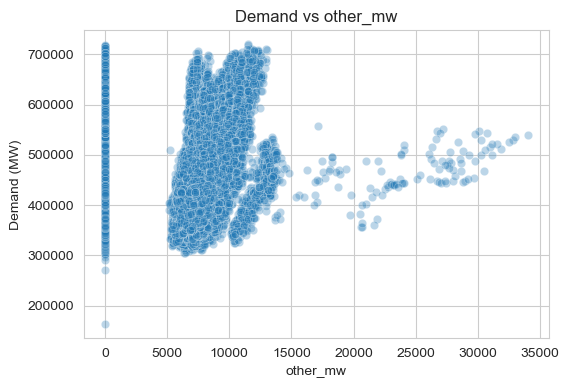

In [23]:
for col in gen_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["demand_mw"], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("Demand (MW)")
    plt.title(f"Demand vs {col}")
    plt.show()

The scatter plots reveal varying relationships between electricity demand and different generation sources. Natural gas generation shows a clear positive relationship with demand, suggesting that it plays a key role in meeting higher load conditions. In contrast, renewable sources such as wind and solar show weaker and more dispersed relationships with demand, indicating that their generation levels are less directly driven by demand.

## 5. Correlation Analysis

Correlation analysis is used to quantify the strength and direction of linear relationships between electricity demand and generation sources. Pearson correlation coefficients provide insight into which variables are most strongly associated with demand and whether multicollinearity exists among predictors.

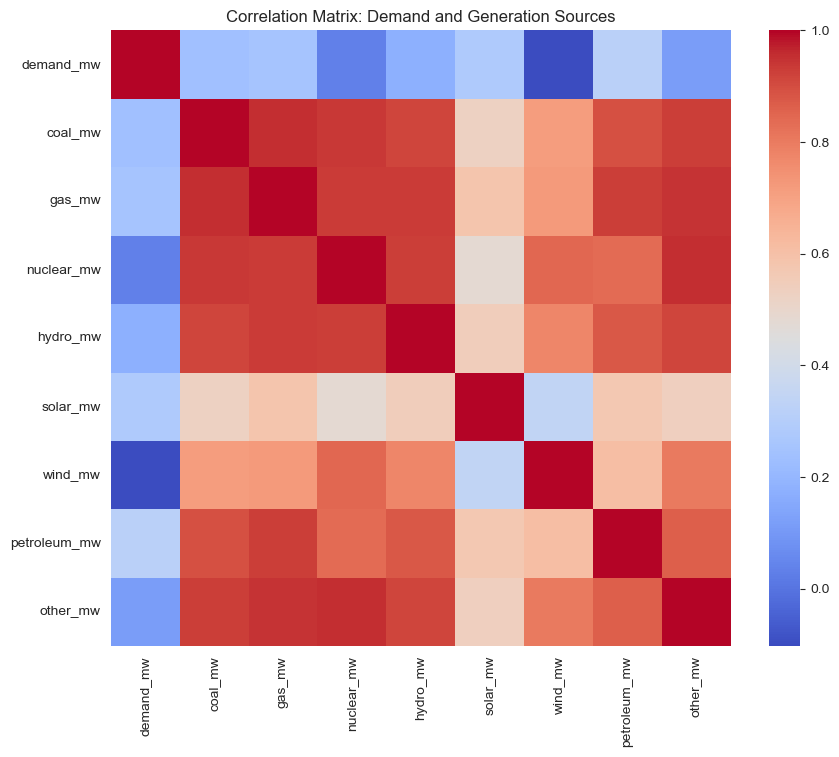

In [24]:
corr = df[["demand_mw"] + gen_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix: Demand and Generation Sources")
plt.show()

The correlation matrix shows that natural gas generation has the strongest positive correlation with electricity demand, reinforcing its role as a primary flexible generation source. Coal and nuclear generation show weaker correlations with demand, consistent with their roles as baseload resources. Renewable sources exhibit relatively low correlations with demand, reflecting their dependence on environmental conditions rather than load requirements.

## 6. Time-Based Analysis

Electricity demand is strongly influenced by time-based factors such as hour of day and season. This section examines temporal patterns to identify daily cycles and seasonal trends that may be useful for feature engineering and forecasting.

In [25]:
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

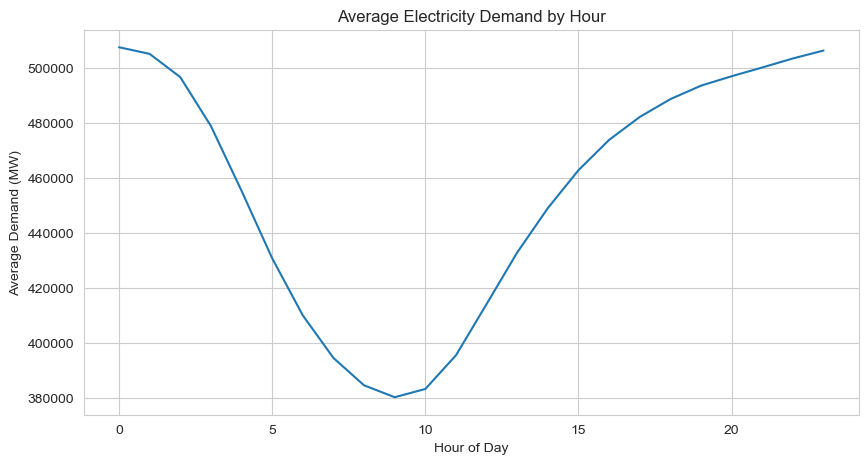

In [26]:
hourly_avg = df.groupby("hour")["demand_mw"].mean()

plt.figure(figsize=(10,5))
hourly_avg.plot()
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand (MW)")
plt.title("Average Electricity Demand by Hour")
plt.show()

The hourly demand profile shows a clear daily cycle, with demand increasing during daytime hours and peaking in the late afternoon or early evening. Demand is lowest during overnight hours. This pattern reflects typical residential, commercial, and industrial electricity usage and suggests that hour-of-day is an important predictive feature.

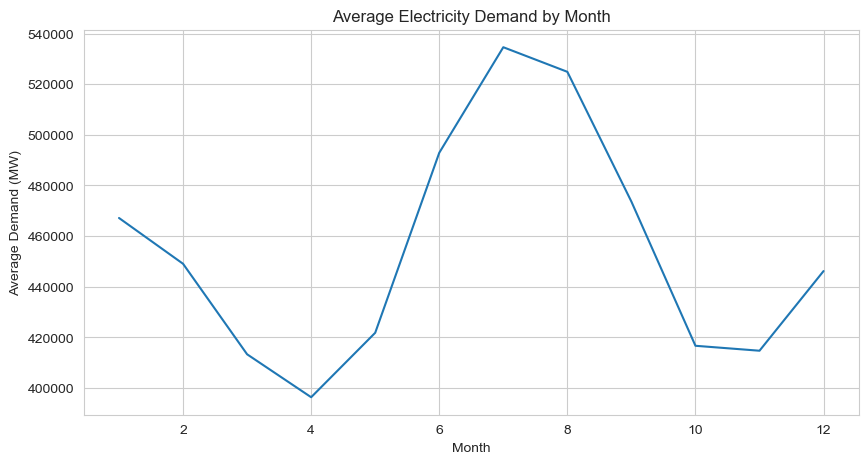

In [27]:
monthly_avg = df.groupby("month")["demand_mw"].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot()
plt.xlabel("Month")
plt.ylabel("Average Demand (MW)")
plt.title("Average Electricity Demand by Month")
plt.show()

Seasonal analysis reveals higher average electricity demand during summer months, likely driven by increased air conditioning usage. Lower demand is observed during spring and fall months, when temperatures are generally milder. These seasonal patterns indicate that month or season-based features will be valuable for modeling.

## 7. Feature Engineering Insights

Based on the exploratory analysis, several features appear promising for demand forecasting. Time-based features such as hour of day and month capture strong cyclical patterns in demand. Natural gas generation shows a strong relationship with demand and may serve as an important explanatory variable. Renewable energy sources display higher variability and may benefit from lagged or rolling features to capture delayed or indirect effects. Additionally, lagged demand values are likely to be informative due to temporal dependence in electricity consumption.

## 8. Key Findings and Next Steps

This exploratory data analysis identified strong daily and seasonal patterns in electricity demand across the U.S. Lower 48. Natural gas generation exhibits the strongest relationship with demand, while renewable sources show greater variability and weaker direct correlations. Time-based features play a critical role in explaining demand behavior and should be incorporated into predictive models.

The next phase of this project will focus on feature engineering, model selection, and demand forecasting. Insights from this EDA will guide the development of models capable of accurately predicting electricity demand under varying temporal and generation conditions.
